# Closed Form Solution of Linear Regression

$$\theta = (X^TX)^{-1}X^TY$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [15]:
X, y = make_regression(n_samples=400, n_features=1, n_informative=1, noise=5, random_state=11)

y = y.reshape((-1, 1))
print(X.shape, y.shape)

(400, 1) (400, 1)


In [16]:
X = (X - X.mean()) / X.std()

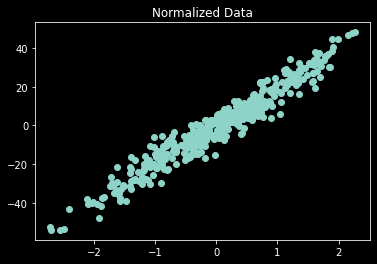

In [17]:
plt.figure()
plt.scatter(X, y)
plt.title("Normalized Data")
plt.show()

In [18]:
ones = np.ones((X.shape[0], 1))
X_ = np.hstack((X, ones))
print(X_.shape)
print(X_[:5, :])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [19]:
def predict(X, theta):
    return np.dot(X, theta)

def getThetaClosedForm(X, y):
    firstPart = np.dot(X.T, X)
    secondPart = np.dot(X.T, y)
    
    theta = np.linalg.pinv(firstPart) @ secondPart
    
    return theta

In [20]:
theta = getThetaClosedForm(X_, y)

print(theta)

[[19.36074254]
 [-0.54972083]]


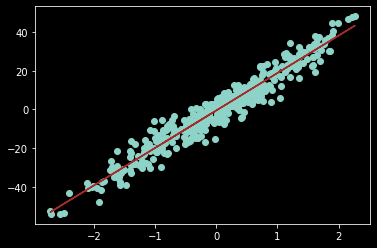

In [21]:
plt.figure()
plt.scatter(X, y)
plt.plot(X, predict(X_, theta), c='brown')
plt.show()

In [22]:
from sklearn.metrics import r2_score


r2_score(y, predict(X_, theta))*100

94.22485438044575